In [77]:
%matplotlib notebook

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
import matplotlib.pyplot as plt


In [56]:
input_file_path = "Resources/bicycle.csv"
file_data = pd.read_csv(input_file_path, delimiter = ";")
file_data

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,"36.0638199896,-79.8216167",No,45,40-49,No,No,With Traffic,C: Possible Injury,Bike Lane / Paved Shoulder,Black,...,Dry,"Two-Way, Not Divided",None,Alley Intersection,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Clear,No
1,"35.2652600997,-81.1976273996",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
2,"35.8248622499,-78.7085441603",Yes,23,20-24,No,No,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop Sign,Clear,No
3,"35.4392357203,-77.55869863",Yes,55,50-59,"Yes-Alcohol, impairment suspected",Yes,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Rural,50 - 55 MPH,No Control Present,Clear,No
4,"35.9426419504,-80.0125032595",Yes,44,40-49,"Yes-Alcohol, impairment suspected",Yes,With Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,Related To Intersection,Smooth Asphalt,Urban,30 - 35 MPH,Yield Sign,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.5014165504,-79.0932358705",Yes,61,60-69,"Yes-Alcohol, impairment suspected",Yes,With Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No
11262,"35.4303761904,-82.5014245704",Yes,23,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,Wet,Unknown,None,No Special Feature,Concrete,Urban,Unknown,No Control Present,Cloudy,No
11263,"35.47509878,-81.2449212604",No,66,60-69,No,No,Not Applicable,O: No Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,Dry,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Clear,No
11264,"35.3189763897,-78.6308291402",No,67,60-69,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No


In [57]:
clean_file_data = file_data.dropna(how='any')
clean_file_data

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,"36.0638199896,-79.8216167",No,45,40-49,No,No,With Traffic,C: Possible Injury,Bike Lane / Paved Shoulder,Black,...,Dry,"Two-Way, Not Divided",None,Alley Intersection,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Clear,No
1,"35.2652600997,-81.1976273996",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
2,"35.8248622499,-78.7085441603",Yes,23,20-24,No,No,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop Sign,Clear,No
3,"35.4392357203,-77.55869863",Yes,55,50-59,"Yes-Alcohol, impairment suspected",Yes,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Rural,50 - 55 MPH,No Control Present,Clear,No
4,"35.9426419504,-80.0125032595",Yes,44,40-49,"Yes-Alcohol, impairment suspected",Yes,With Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,Related To Intersection,Smooth Asphalt,Urban,30 - 35 MPH,Yield Sign,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.5014165504,-79.0932358705",Yes,61,60-69,"Yes-Alcohol, impairment suspected",Yes,With Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No
11262,"35.4303761904,-82.5014245704",Yes,23,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,Wet,Unknown,None,No Special Feature,Concrete,Urban,Unknown,No Control Present,Cloudy,No
11263,"35.47509878,-81.2449212604",No,66,60-69,No,No,Not Applicable,O: No Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,Dry,"Two-Way, Not Divided",None,"Driveway, Public",Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Clear,No
11264,"35.3189763897,-78.6308291402",No,67,60-69,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No


In [58]:
file_data[["Latitude", "Longitude"]] = file_data["geo_point_2d"].str.split(',',expand=True)
file_data

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,Latitude,Longitude
0,"36.0638199896,-79.8216167",No,45,40-49,No,No,With Traffic,C: Possible Injury,Bike Lane / Paved Shoulder,Black,...,None,Alley Intersection,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Clear,No,36.0638199896,-79.8216167
1,"35.2652600997,-81.1976273996",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,None,Four-Way Intersection,Smooth Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,35.2652600997,-81.1976273996
2,"35.8248622499,-78.7085441603",Yes,23,20-24,No,No,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop Sign,Clear,No,35.8248622499,-78.7085441603
3,"35.4392357203,-77.55869863",Yes,55,50-59,"Yes-Alcohol, impairment suspected",Yes,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,...,None,No Special Feature,Smooth Asphalt,Rural,50 - 55 MPH,No Control Present,Clear,No,35.4392357203,-77.55869863
4,"35.9426419504,-80.0125032595",Yes,44,40-49,"Yes-Alcohol, impairment suspected",Yes,With Traffic,C: Possible Injury,Travel Lane,Black,...,None,Related To Intersection,Smooth Asphalt,Urban,30 - 35 MPH,Yield Sign,Clear,No,35.9426419504,-80.0125032595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.5014165504,-79.0932358705",Yes,61,60-69,"Yes-Alcohol, impairment suspected",Yes,With Traffic,C: Possible Injury,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No,34.5014165504,-79.0932358705
11262,"35.4303761904,-82.5014245704",Yes,23,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,None,No Special Feature,Concrete,Urban,Unknown,No Control Present,Cloudy,No,35.4303761904,-82.5014245704
11263,"35.47509878,-81.2449212604",No,66,60-69,No,No,Not Applicable,O: No Injury,Sidewalk / Crosswalk / Driveway Crossing,White,...,None,"Driveway, Public",Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Clear,No,35.47509878,-81.2449212604
11264,"35.3189763897,-78.6308291402",No,67,60-69,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,35.3189763897,-78.6308291402


In [59]:
Grp_by_DrvrAgeGrp = file_data.groupby(["DrvrAgeGrp"])["geo_point_2d"].count()
Grp_by_DrvrAgeGrp

DrvrAgeGrp
0-19        646
20-24      1199
25-29      1076
30-39      1766
40-49      1657
50-59      1430
60-69      1076
70+         876
Unknown    1540
Name: geo_point_2d, dtype: int64

In [60]:
Flg_by_DrvrAlcFlg = crash_data.groupby(["DrvrAlcFlg"])["geo_point_2d"].count()
Flg_by_DrvrAlcFlg.sort_values(ascending=False)

DrvrAlcFlg
No         9483
Missing    1257
Unknown     353
Yes         173
Name: geo_point_2d, dtype: int64

In [61]:
Sex_by_Drv_race = file_data.groupby(["DrvrSex"])["geo_point_2d"].count()
Sex_by_Drv_race.sort_values(ascending=False)

DrvrSex
Male       5291
Female     4444
Unknown    1531
Name: geo_point_2d, dtype: int64

In [62]:
Age_by_DrvrAge = file_data.groupby(["DrvrAge"])["geo_point_2d"].count()
Age_by_DrvrAge.sort_values(ascending=False).head()
                             

DrvrAge
999    1540
21      257
20      251
22      246
25      239
Name: geo_point_2d, dtype: int64

In [63]:
Drg_by_DrvrAlcDrg = file_data.groupby(["DrvrAlcDrg"])["geo_point_2d"].count()
Drg_by_DrvrAlcDrg.sort_values(ascending=False).head()



DrvrAlcDrg
No                                   7001
.                                    2830
Missing                               945
Unknown                               353
Yes-Alcohol, impairment suspected      76
Name: geo_point_2d, dtype: int64

In [64]:
injury_by_DrvrInjury = file_data.groupby(["DrvrInjury"])["geo_point_2d"].count()
injury_by_DrvrInjury


DrvrInjury
A: Suspected Serious Injury      10
B: Suspected Minor Injury        82
C: Possible Injury              168
K: Killed                         2
O: No Injury                   9390
Unknown Injury                 1614
Name: geo_point_2d, dtype: int64

In [65]:
Veh_by_DrvrVehTyp = file_data.groupby(["DrvrVehTyp"])["geo_point_2d"].count()
Veh_by_DrvrVehTyp

DrvrVehTyp
Activity Bus                               2
Commercial Bus                            24
EMS Vehicle, Ambulance, Rescue Squad       2
Firetruck                                  1
Light Truck (Mini-Van, Panel)            159
Moped                                      9
Motor Home/Recreational Vehicle            3
Motorcycle                                59
Other Bus                                 16
Passenger Car                           5903
Pedalcycle                                28
Pedestrian                                 7
Pickup                                  1452
Police                                    55
School Bus                                20
Single Unit Truck (2-Axle, 6-Tire)        77
Single Unit Truck (3 Or More Axles)       19
Sport Utility                           1891
Taxicab                                   18
Tractor/Semi-Trailer                      27
Truck/Tractor                              2
Truck/Trailer                             26

In [66]:
Race_by_DrvrRace = file_data.groupby(["DrvrRace"])["geo_point_2d"].count()
Race_by_DrvrRace

DrvrRace
Asian               119
Black              2940
Hispanic            392
Native American     114
Other               142
Unknown/Missing    1563
White              5996
Name: geo_point_2d, dtype: int64

In [94]:
Drv = ["Asian","Black","Hispanic","Native", "Other","Missing","White"]
bars_in_Drv = [119,2940,392,114,142,1563,5996]
x_axis = np.arange(len(bars_in_Drv))

<IPython.core.display.Javascript object>


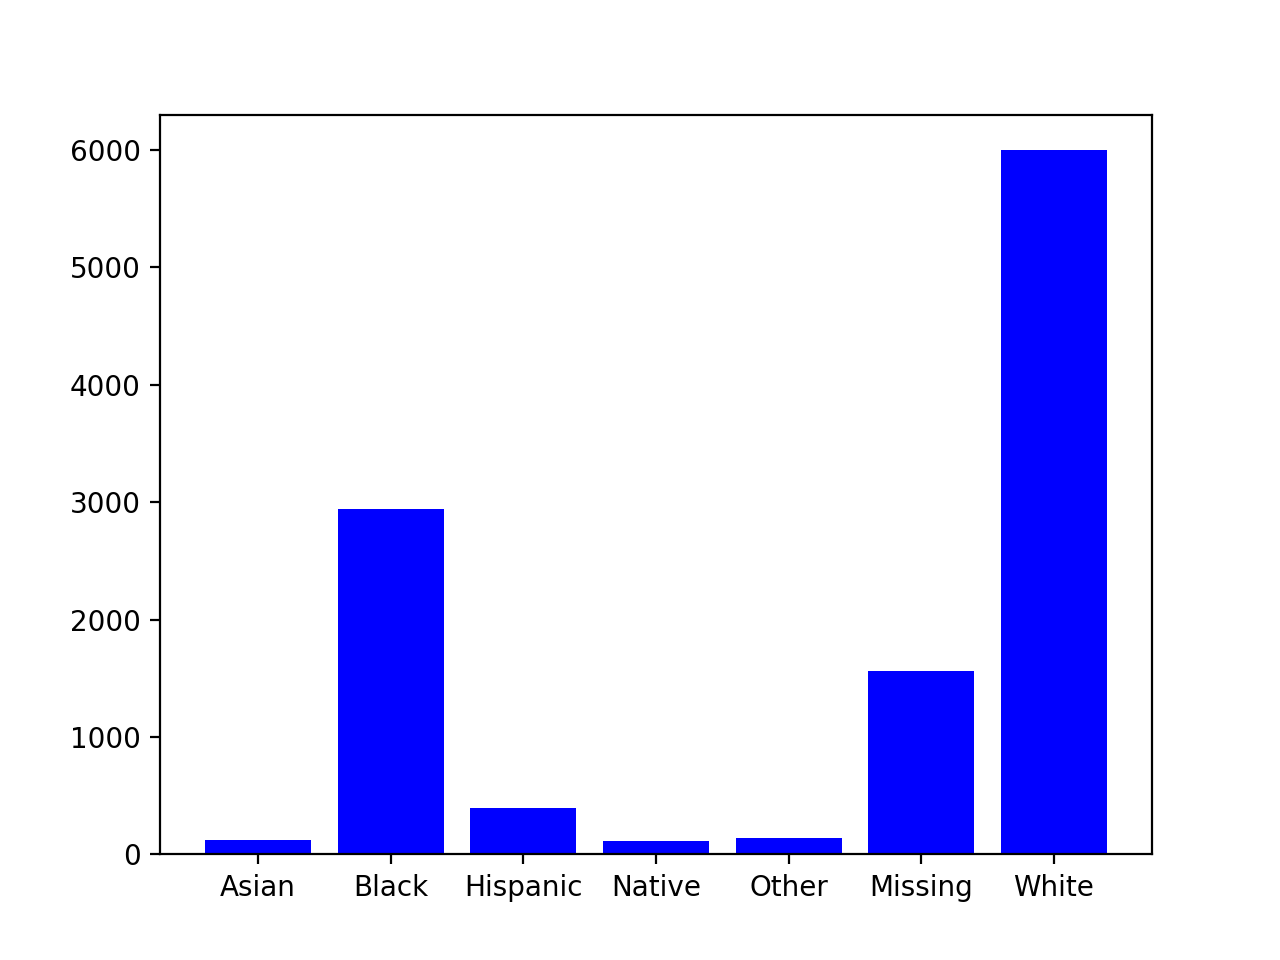

<BarContainer object of 7 artists>

In [96]:
plt.bar(x_axis, bars_in_Drv, color="b", align="center")


In [98]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drv)

([<matplotlib.axis.XTick at 0x1a22184cf8>,
 <a list of 7 Text xticklabel objects>)